Delieverable 3

Yunzhe Yu

1. Import all the libraries needed 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

2. Occupancy Status

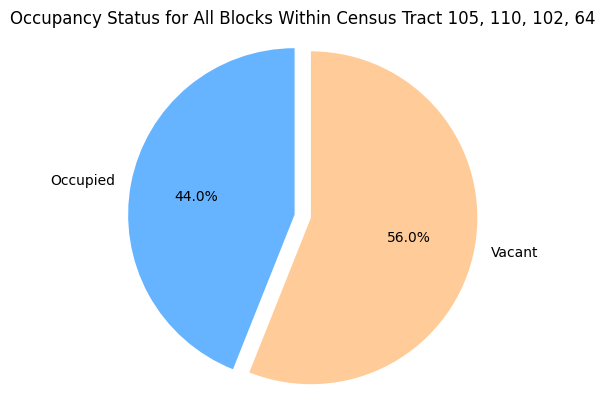

In [2]:
def clean_value(value):
    return float(re.sub(r'[^\d.]', '', value))

# Read the CSV file
data = pd.read_csv('DECENNIALPL2010.H1-2023-04-06T002534.csv')


# Find rows containing 'Occupied' and 'Vacant' in the 'Label (Grouping)' column
occupied_rows = data['Label (Grouping)'].str.contains('Occupied')
vacant_rows = data['Label (Grouping)'].str.contains('Vacant')

# Identify the column name for the total count
count_column = data.columns[-1]

# Clean the values and sum the values for occupied and vacant housing units
occupied = data.loc[occupied_rows, count_column].apply(clean_value).sum()
vacant = data.loc[vacant_rows, count_column].apply(clean_value).sum()

# Create a pie chart
labels = ['Occupied', 'Vacant']
sizes = [occupied, vacant]
colors = ['#66b3ff', '#ffcc99']
explode = (0.1, 0)  # Explode the 'Occupied' slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.title('Occupancy Status for All Blocks Within Census Tract 105, 110, 102, 64')
plt.savefig('nmsl.png')
plt.show()



Breakdown of each tract

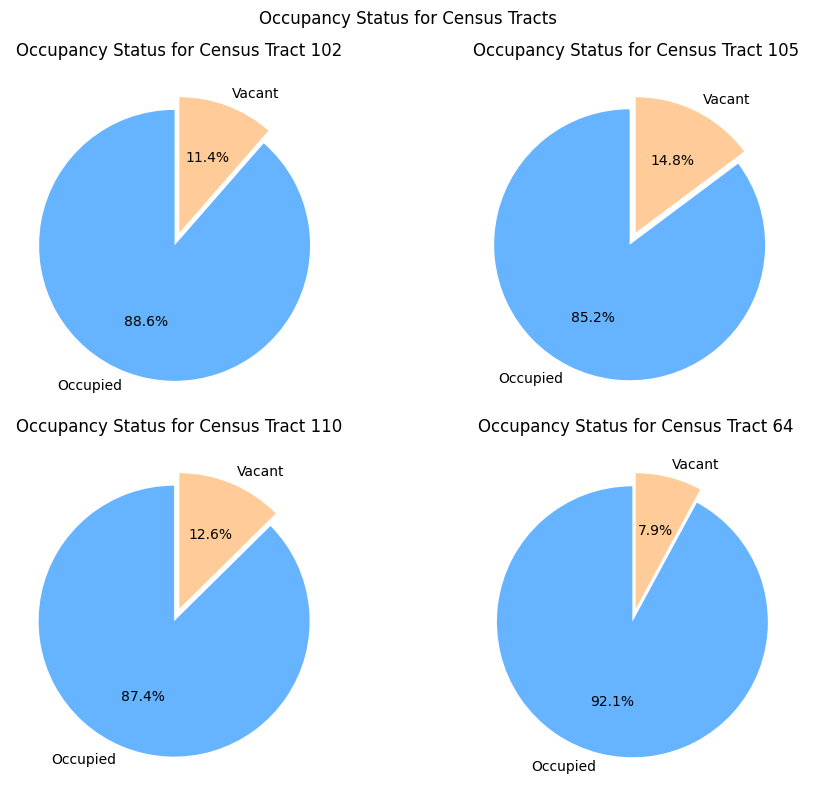

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def clean_value(value):
    return float(re.sub(r'[^\d.]', '', value))

# Read the CSV file
data = pd.read_csv('DECENNIALPL2010.H1-2023-04-06T002534.csv')

data = data.set_index("Label (Grouping)").transpose().reset_index()
data = data.melt(id_vars="index", var_name="Status", value_name="Value")

# Extract tract and block information from the index column
data["Tract"] = data["index"].str.extract(r"Census Tract (\d+(?:\.\d+)?)")
data["Block"] = data["index"].str.extract(r"Block (\d+)")

# Convert the "Value" column to numeric type
data["Value"] = pd.to_numeric(data["Value"], errors='coerce')

# Group by Tract and Status
grouped_data = data.groupby(["Tract", "Status"])["Value"].sum().reset_index()

# Pivot the grouped_data DataFrame to have 'Status' as columns
grouped_data = grouped_data.pivot(index="Tract", columns="Status", values="Value").reset_index().rename_axis(None, axis=1)

# Update the column names in grouped_data
grouped_data.columns = ['Tract', 'Total', 'Occupied', 'Vacant']

# Create a subplot grid with 2 rows and 2 columns, and adjust the size of the figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Iterate over the grouped_data dataframe to plot each pie chart in a specific subplot
for index, row in grouped_data.iterrows():
    tract = row['Tract']
    occupied = row['Occupied']
    vacant = row['Vacant']
    
    labels = ['Occupied', 'Vacant']
    sizes = [occupied, vacant]
    colors = ['#66b3ff', '#ffcc99']
    explode = (0.1, 0)  # Explode the 'Occupied' slice
    
    # Plot the pie chart in a specific subplot
    ax = axes[index//2, index%2]
    ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Occupancy Status for Census Tract {tract}')

# Add a suptitle for the entire figure
fig.suptitle("Occupancy Status for Census Tracts")

# Adjust the spacing between subplots
fig.tight_layout()

# Save and show the figure
plt.savefig('occupancy_status_all_tracts.png')
plt.show()


3. Tenure Distribution 

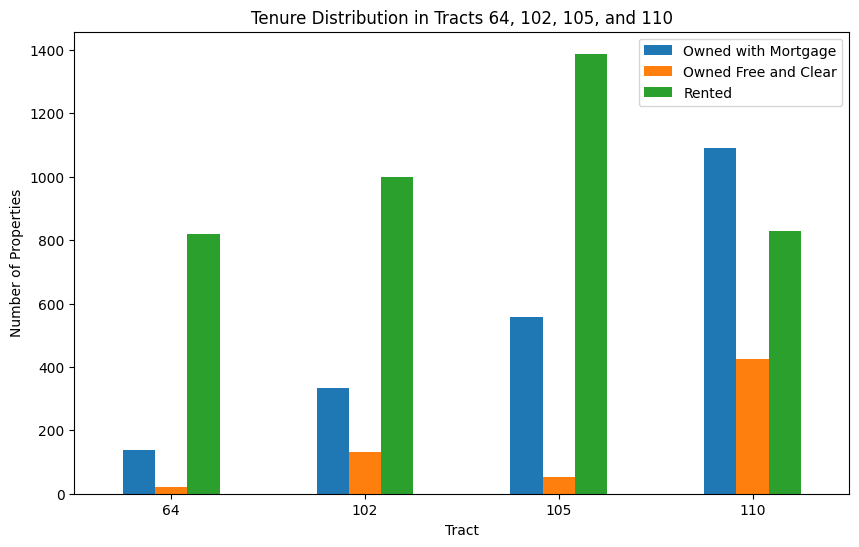

In [3]:
# Load the data from your local CSV file and transpose it
data = pd.read_csv('DECENNIALSF12010.H4-2023-04-14T181346.csv', index_col=0).transpose()

# Reset the index
data = data.reset_index()

# Set the new column names
data.columns = ['Block', 'Total', 'Owned_with_mortgage', 'Owned_free_clear', 'Rented']

# Convert columns to numeric data type
data[['Owned_with_mortgage', 'Owned_free_clear', 'Rented']] = data[['Owned_with_mortgage', 'Owned_free_clear', 'Rented']].apply(pd.to_numeric, errors='coerce')

# Extract tract information from block names and add it as a new column
data['Tract'] = data['Block'].apply(lambda x: int(x.split('Census Tract ')[1].split(',')[0]))

# Filter the data for the tracts we are interested in
filtered_data = data[data['Tract'].isin([64, 102, 105, 110])]

# Group the data by tract and calculate the sum of owned with mortgage, owned free and clear, and rented properties
tenure_data = filtered_data.groupby('Tract')[['Owned_with_mortgage', 'Owned_free_clear', 'Rented']].sum()

# Create the bar chart
ax = tenure_data.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Tenure Distribution in Tracts 64, 102, 105, and 110')
plt.xlabel('Tract')
plt.ylabel('Number of Properties')
plt.xticks(rotation=0)
plt.legend(['Owned with Mortgage', 'Owned Free and Clear', 'Rented'])
plt.savefig('nmsl1.png')
plt.show()


4. tenure pie charts

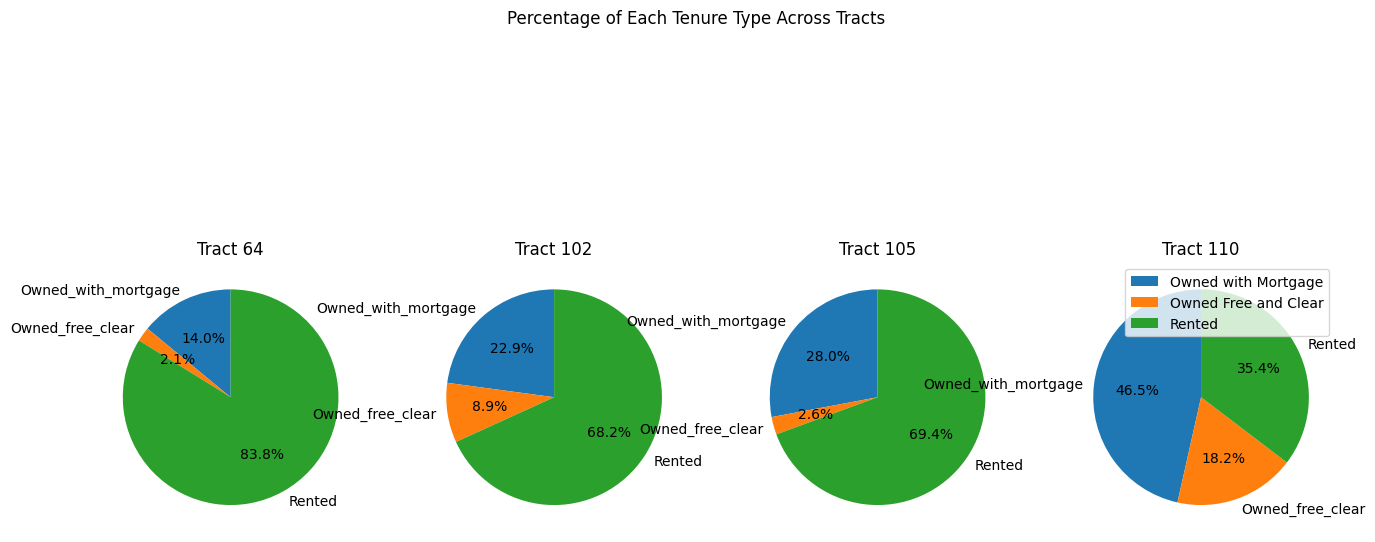

In [4]:
# Load the data from your local CSV file and transpose it
data = pd.read_csv('DECENNIALSF12010.H4-2023-04-14T181346.csv', index_col=0).transpose()

# Reset the index
data = data.reset_index()

# Set the new column names
data.columns = ['Block', 'Total', 'Owned_with_mortgage', 'Owned_free_clear', 'Rented']

# Convert columns to numeric data type
data[['Owned_with_mortgage', 'Owned_free_clear', 'Rented']] = data[['Owned_with_mortgage', 'Owned_free_clear', 'Rented']].apply(pd.to_numeric, errors='coerce')

# Extract tract information from block names and add it as a new column
data['Tract'] = data['Block'].apply(lambda x: int(x.split('Census Tract ')[1].split(',')[0]))

# Filter the data for the tracts we are interested in
filtered_data = data[data['Tract'].isin([64, 102, 105, 110])]

# Group the data by tract and calculate the sum of owned with mortgage, owned free and clear, and rented properties
tenure_data = filtered_data.groupby('Tract')[['Owned_with_mortgage', 'Owned_free_clear', 'Rented']].sum()

# Normalize the data by dividing each tenure type by the total number of properties in the tract
tenure_data_normalized = tenure_data.div(tenure_data.sum(axis=1), axis=0)

# Create pie charts for each tract
fig, axes = plt.subplots(1, len(tenure_data_normalized), figsize=(16, 8))
plt.suptitle('Percentage of Each Tenure Type Across Tracts')

for i, (tract, row) in enumerate(tenure_data_normalized.iterrows()):
    row.plot(kind='pie', ax=axes[i], autopct='%.1f%%', startangle=90)
    axes[i].set_ylabel('')
    axes[i].set_title(f'Tract {tract}')

plt.legend(['Owned with Mortgage', 'Owned Free and Clear', 'Rented'], loc='upper right')
plt.savefig('nms2.png')
plt.show()


5. Average Household Size

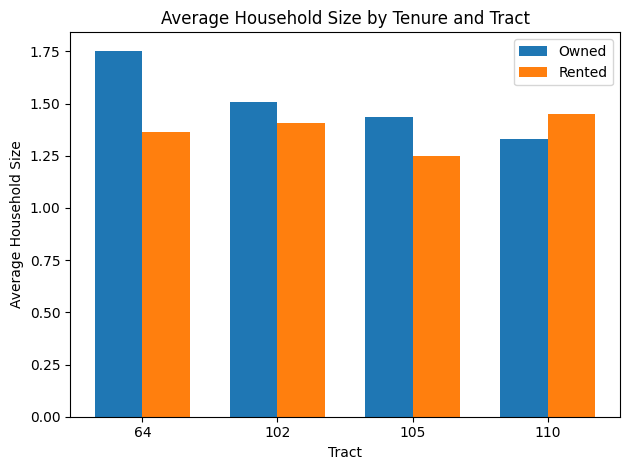

In [5]:
def clean_value(value):
    if isinstance(value, str) and "(" in value:
        value = value.split("(")[0].strip()
    return int(value)

# Read the CSV file
file_name = "DECENNIALSF12010.H16-2023-04-05T210319.csv"
data = pd.read_csv(file_name)

# Filter the data for the required tracts
tracts = [64, 102, 105, 110]

# Process the data to have the columns: TRACT, BLOCK, TENURE, HOUSEHOLD_SIZE
processed_data = pd.DataFrame(columns=["TRACT", "BLOCK", "TENURE", "HOUSEHOLD_SIZE"])

for col in data.columns[1:]:
    tract = int(col.split(",")[2].strip().split(" ")[-1])
    if tract not in tracts:
        continue
    
    block = col.strip()
    total = clean_value(data.loc[0, col])
    owned = clean_value(data.loc[1, col])
    rented = total - owned
    owned_sizes = [clean_value(data.loc[i, col]) for i in range(2, 5)]
    rented_sizes = [clean_value(data.loc[i, col]) for i in range(5, 8)]
    
    for i, count in enumerate(owned_sizes):
        for _ in range(count):
            processed_data = pd.concat([processed_data, pd.DataFrame({"TRACT": [tract], "BLOCK": [block], "TENURE": ["Owned"], "HOUSEHOLD_SIZE": [i + 1]})], ignore_index=True)
    
    for i, count in enumerate(rented_sizes):
        for _ in range(count):
            processed_data = pd.concat([processed_data, pd.DataFrame({"TRACT": [tract], "BLOCK": [block], "TENURE": ["Rented"], "HOUSEHOLD_SIZE": [i + 1]})], ignore_index=True)

# Calculate the average household size for rented and owned properties in each tract
average_household_size = processed_data.groupby(["TRACT", "TENURE"])["HOUSEHOLD_SIZE"].mean().reset_index()

# Create the grouped bar chart
fig, ax = plt.subplots()
width = 0.35

owned_data = average_household_size[average_household_size["TENURE"] == "Owned"]
rented_data = average_household_size[average_household_size["TENURE"] == "Rented"]

x_labels = owned_data["TRACT"].astype(str).unique()
x = np.arange(len(x_labels))

rects1 = ax.bar(x - width / 2, owned_data["HOUSEHOLD_SIZE"], width, label='Owned')
rects2 = ax.bar(x + width / 2, rented_data["HOUSEHOLD_SIZE"], width, label='Rented')

ax.set_ylabel('Average Household Size')
ax.set_xlabel('Tract')
ax.set_title('Average Household Size by Tenure and Tract')
ax.set_xticks(x)
ax.set_xticklabels(x_labels)
ax.legend()

fig.tight_layout()
plt.savefig('nmsl3.png')
plt.show()


6. Age Distribute

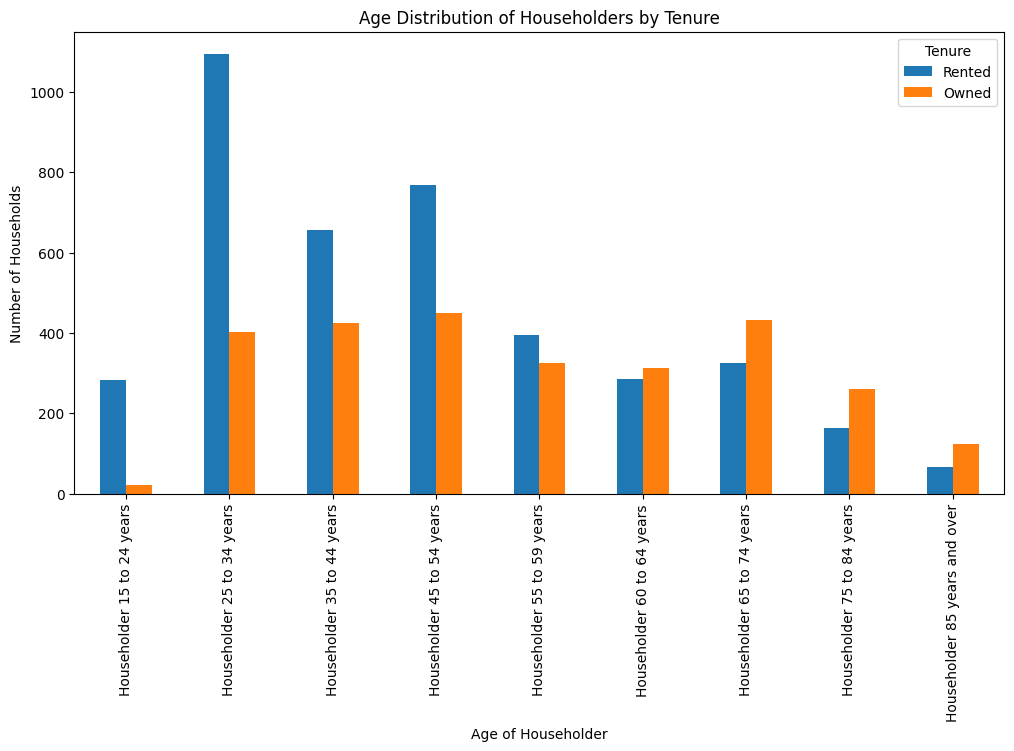

In [9]:
# Load the data from the CSV file
data = pd.read_csv("DECENNIALSF12010.H17-2023-04-05T210328.csv")

# Replace non-breaking spaces with regular spaces
data['Label (Grouping)'] = data['Label (Grouping)'].str.replace(u'\xa0', u' ')

# Melt the data into a long format
melted_data = pd.melt(data, id_vars=['Label (Grouping)'], var_name='Block', value_name='Count')

# Filter out the 'Total:' row
filtered_data = melted_data[melted_data['Label (Grouping)'] != 'Total:'].copy()

# Extract Tenure and Age of Householder from the 'Label (Grouping)' column
filtered_data['Tenure'] = filtered_data['Label (Grouping)'].apply(lambda x: 'Owner' if 'Owner occupied:' in x else ('Renter' if 'Renter occupied:' in x else None))
filtered_data['Age of Householder'] = filtered_data['Label (Grouping)'].str.extract('(Householder [0-9]+ to [0-9]+ years|Householder 85 years and over)', expand=False)
filtered_data['Tenure'].fillna(method='ffill', inplace=True)

# Drop the 'Label (Grouping)' column
filtered_data.drop('Label (Grouping)', axis=1, inplace=True)

# Convert the 'Count' column to numeric data type
filtered_data['Count'] = pd.to_numeric(filtered_data['Count'], errors='coerce')

# Drop any rows with missing values
filtered_data.dropna(inplace=True)

# Create a pivot table with 'Age of Householder' as the index, 'Tenure' as the columns, and the sum of 'Count' as the values
pivot_data = filtered_data.pivot_table(index='Age of Householder', columns='Tenure', values='Count', aggfunc='sum')[['Renter', 'Owner']]

# Plot the unstacked bar chart
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('Age of Householder')
plt.ylabel('Number of Households')
plt.title('Age Distribution of Householders by Tenure')
plt.xticks(range(len(pivot_data.index)), pivot_data.index, rotation=90)
plt.legend(title='Tenure', labels=['Rented', 'Owned'])
plt.savefig('nmsl4.png')
plt.show()


Specific

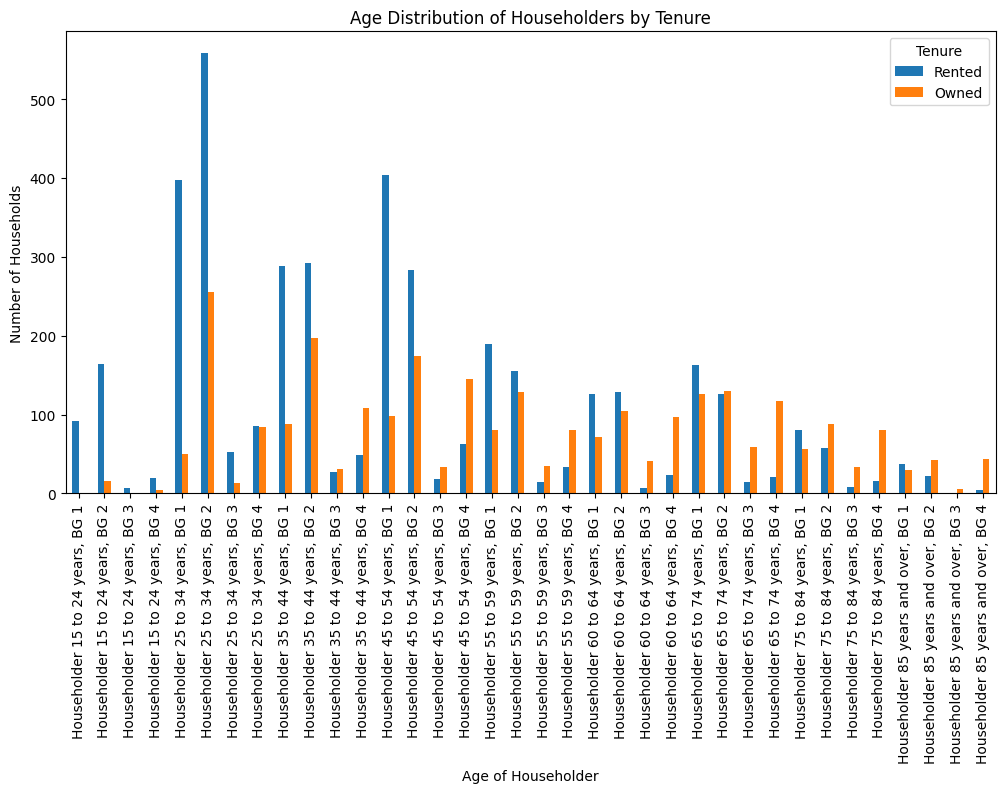

In [7]:
# Load the data from the CSV file
data = pd.read_csv("DECENNIALSF12010.H17-2023-04-05T210328.csv")

# Replace non-breaking spaces with regular spaces
data['Label (Grouping)'] = data['Label (Grouping)'].str.replace(u'\xa0', u' ')

melted_data = pd.melt(data, id_vars=['Label (Grouping)'], var_name='Block', value_name='Count')
melted_data['Block Group'] = melted_data['Block'].str.extract('Block Group (\d)', expand=False)

# Filter out the 'Total:' row
filtered_data = melted_data[melted_data['Label (Grouping)'] != 'Total:'].copy()

# Extract Tenure and Age of Householder from the 'Label (Grouping)' column
filtered_data['Tenure'] = filtered_data['Label (Grouping)'].apply(lambda x: 'Owner' if 'Owner occupied:' in x else ('Renter' if 'Renter occupied:' in x else None))
filtered_data['Age of Householder'] = filtered_data['Label (Grouping)'].str.extract('(Householder [0-9]+ to [0-9]+ years|Householder 85 years and over)', expand=False)
filtered_data['Tenure'].fillna(method='ffill', inplace=True)

# Drop the 'Label (Grouping)' column
filtered_data.drop('Label (Grouping)', axis=1, inplace=True)

# Convert the 'Count' column to numeric data type
filtered_data['Count'] = pd.to_numeric(filtered_data['Count'], errors='coerce')

# Drop any rows with missing values
filtered_data.dropna(inplace=True)

# Create a pivot table with 'Age of Householder' as the index, 'Tenure' as the columns, and the sum of 'Count' as the values
pivot_data = filtered_data.pivot_table(index=['Age of Householder', 'Block Group'], columns='Tenure', values='Count', aggfunc='sum')[['Renter', 'Owner']]


# Plot the unstacked bar chart
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.xlabel('Age of Householder')
plt.ylabel('Number of Households')
plt.title('Age Distribution of Householders by Tenure')
plt.xticks(range(len(pivot_data.index)), [f"{x[0]}, BG {x[1]}" for x in pivot_data.index], rotation=90)
plt.legend(title='Tenure', labels=['Rented', 'Owned'])
plt.savefig('nmsl4.png')
plt.show()

several charts

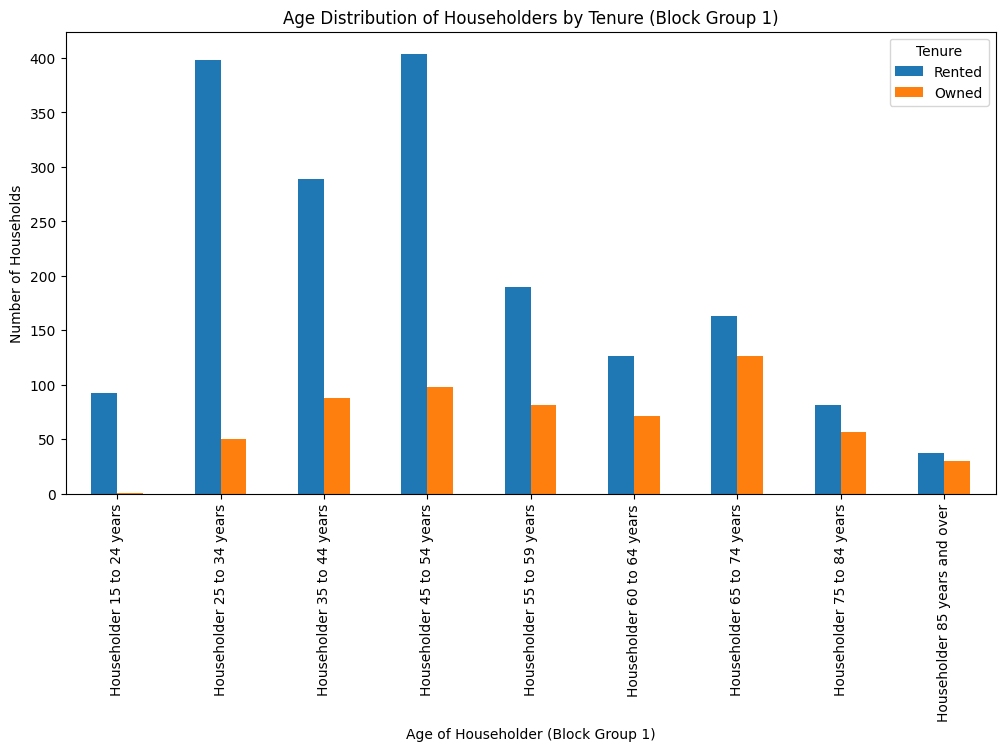

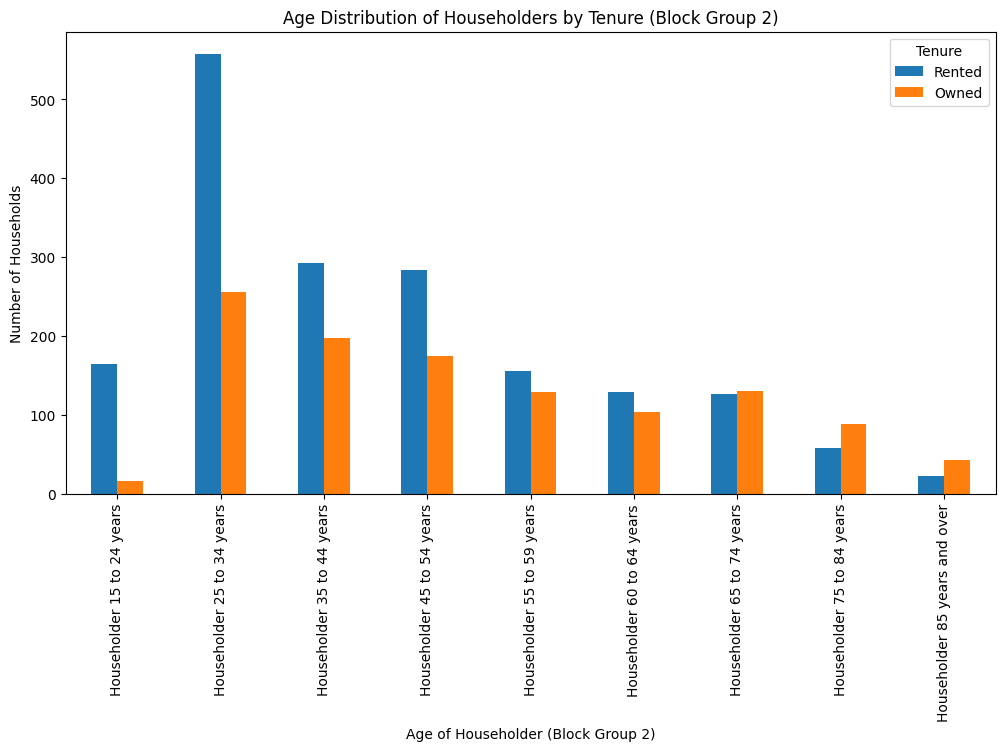

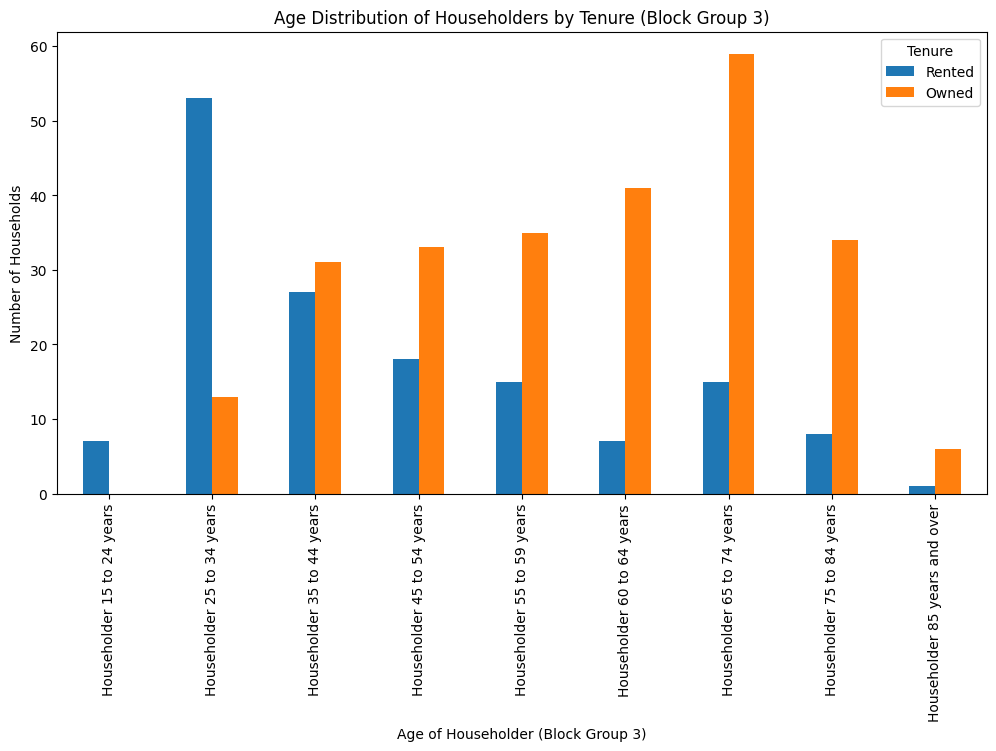

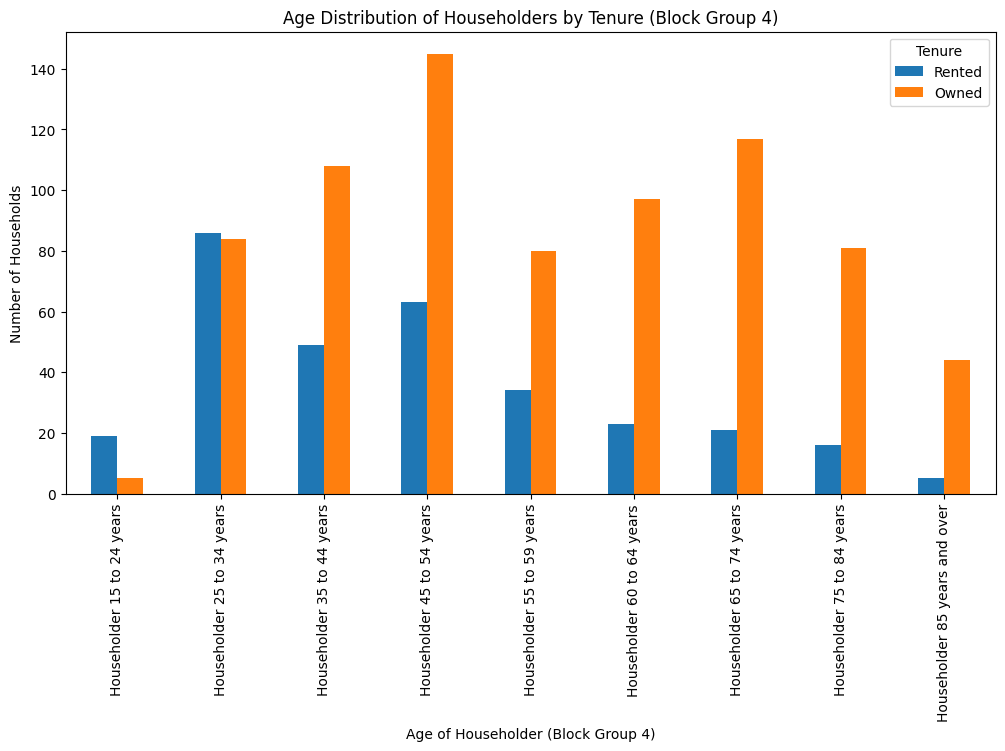

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
data = pd.read_csv("DECENNIALSF12010.H17-2023-04-05T210328.csv")

# Replace non-breaking spaces with regular spaces
data['Label (Grouping)'] = data['Label (Grouping)'].str.replace(u'\xa0', u' ')

# Melt the data into a long format
melted_data = pd.melt(data, id_vars=['Label (Grouping)'], var_name='Block', value_name='Count')

# Filter out the 'Total:' row
filtered_data = melted_data[melted_data['Label (Grouping)'] != 'Total:'].copy()

# Extract Tenure, Age of Householder, and Block Group from the 'Label (Grouping)' and 'Block' columns
filtered_data['Tenure'] = filtered_data['Label (Grouping)'].apply(lambda x: 'Owner' if 'Owner occupied:' in x else ('Renter' if 'Renter occupied:' in x else None))
filtered_data['Age of Householder'] = filtered_data['Label (Grouping)'].str.extract('(Householder [0-9]+ to [0-9]+ years|Householder 85 years and over)', expand=False)
filtered_data['Block Group'] = filtered_data['Block'].str.extract('Block Group ([0-9]+)', expand=False)
filtered_data['Tenure'].fillna(method='ffill', inplace=True)

# Drop the 'Label (Grouping)' column
filtered_data.drop('Label (Grouping)', axis=1, inplace=True)

# Convert the 'Count' column to numeric data type
filtered_data['Count'] = pd.to_numeric(filtered_data['Count'], errors='coerce')

# Drop any rows with missing values
filtered_data.dropna(inplace=True)

# Create a pivot table with 'Age of Householder' and 'Block Group' as the index, 'Tenure' as the columns, and the sum of 'Count' as the values
pivot_data = filtered_data.pivot_table(index=['Age of Householder', 'Block Group'], columns='Tenure', values='Count', aggfunc='sum')[['Renter', 'Owner']]

# Plot separate bar charts for each block group
block_groups = filtered_data['Block Group'].unique()

for block_group in block_groups:
    block_group_data = pivot_data.xs(block_group, level='Block Group')
    block_group_data.plot(kind='bar', stacked=False, figsize=(12, 6))
    plt.xlabel(f'Age of Householder (Block Group {block_group})')
    plt.ylabel('Number of Households')
    plt.title(f'Age Distribution of Householders by Tenure (Block Group {block_group})')
    plt.xticks(range(len(block_group_data.index)), block_group_data.index, rotation=90)
    plt.legend(title='Tenure', labels=['Rented', 'Owned'])
    plt.savefig(f'block_group_{block_group}.png')
    plt.show()
